In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# load data from google drive
# should be executed every time you have to load the file in google drive

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) # your google drive will be mounted as '/content/gdrive/My Drive/*'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# load train, test, people from google drive
train = pd.read_csv('/content/gdrive/My Drive/colab/redhat/dataset/act_train.csv', parse_dates=['date'])
# test = pd.read_csv('/content/gdrive/My Drive/colab/redhat/dataset/act_test.csv', parse_dates=['date'])
people = pd.read_csv('/content/gdrive/My Drive/colab/redhat/dataset/people.csv', parse_dates=['date'])

# train = pd.read_csv('../data/act_train.csv', parse_dates=['date'])
# test = pd.read_csv('../data/act_test.csv', parse_dates=['date'])
# people = pd.read_csv('../data/people.csv', parse_dates=['date'])

sel_col = [2, *np.arange(4,14)]
a = train.columns[sel_col]
b = ['act_' + train.columns[i] for i in sel_col]
mapping = dict(zip(a, b))

sel_col_ppl = np.arange(1,41)
a_ppl = people.columns[sel_col_ppl]
b_ppl = ['ppl_' + people.columns[i] for i in sel_col_ppl]
mapping_ppl = dict(zip(a_ppl, b_ppl))

train = train.rename(columns=mapping)
# test = test.rename(columns=mapping)
people = people.rename(columns=mapping_ppl)


df_train = pd.merge(train, people, on='people_id')
# df_test = pd.merge(test, people, on='people_id')


# del train, test, people
del train, people

In [11]:
df_train.head()

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,...,ppl_char_29,ppl_char_30,ppl_char_31,ppl_char_32,ppl_char_33,ppl_char_34,ppl_char_35,ppl_char_36,ppl_char_37,ppl_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


In [12]:
len(df_train.columns)

55

In [13]:
df_train.columns.to_series().groupby(df_train.dtypes).groups

{dtype('<M8[ns]'): Index(['act_date', 'ppl_date'], dtype='object'),
 dtype('bool'): Index(['ppl_char_10', 'ppl_char_11', 'ppl_char_12', 'ppl_char_13',
        'ppl_char_14', 'ppl_char_15', 'ppl_char_16', 'ppl_char_17',
        'ppl_char_18', 'ppl_char_19', 'ppl_char_20', 'ppl_char_21',
        'ppl_char_22', 'ppl_char_23', 'ppl_char_24', 'ppl_char_25',
        'ppl_char_26', 'ppl_char_27', 'ppl_char_28', 'ppl_char_29',
        'ppl_char_30', 'ppl_char_31', 'ppl_char_32', 'ppl_char_33',
        'ppl_char_34', 'ppl_char_35', 'ppl_char_36', 'ppl_char_37'],
       dtype='object'),
 dtype('int64'): Index(['outcome', 'ppl_char_38'], dtype='object'),
 dtype('O'): Index(['people_id', 'activity_id', 'activity_category', 'act_char_1',
        'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6',
        'act_char_7', 'act_char_8', 'act_char_9', 'act_char_10', 'ppl_char_1',
        'ppl_group_1', 'ppl_char_2', 'ppl_char_3', 'ppl_char_4', 'ppl_char_5',
        'ppl_char_6', 'ppl_ch

In [14]:
for d in ['act_date', 'ppl_date']:
    print('Start of ' + d + ': ' + str(df_train[d].min().date()))
    print('  End of ' + d + ': ' + str(df_train[d].max().date()))
    print('Range of ' + d + ': ' + str(df_train[d].max() - df_train[d].min()) + '\n')

Start of act_date: 2022-07-17
  End of act_date: 2023-08-31
Range of act_date: 410 days 00:00:00

Start of ppl_date: 2020-05-18
  End of ppl_date: 2023-08-31
Range of ppl_date: 1200 days 00:00:00



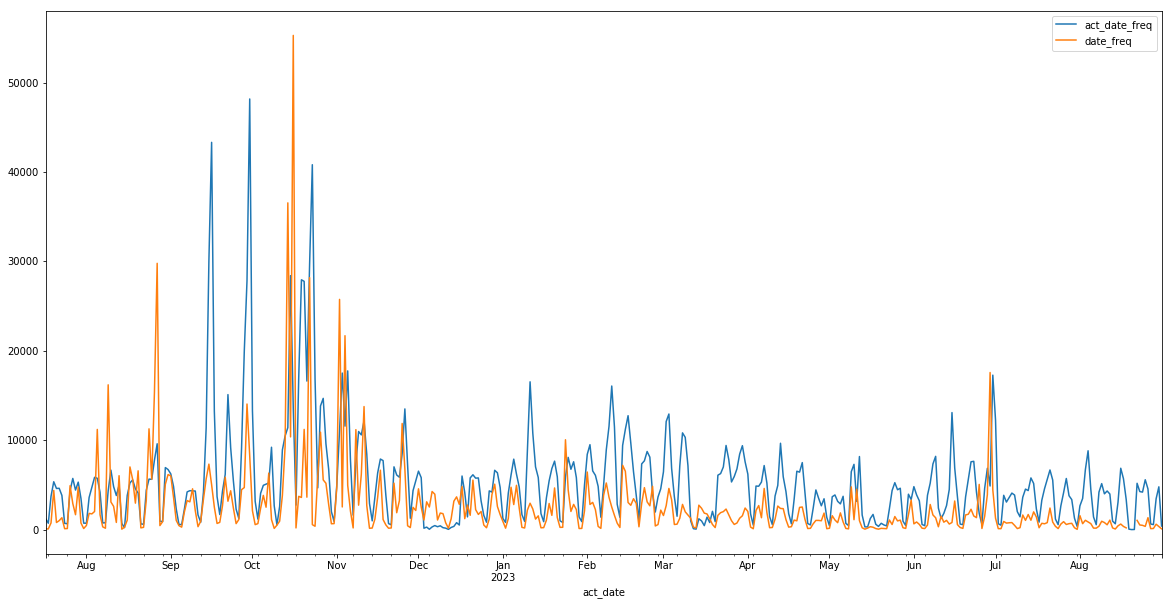

In [15]:
date = pd.DataFrame()
date['act_date_freq'] = df_train.groupby('act_date')['outcome'].count()
date['date_freq'] = df_train.groupby('ppl_date')['outcome'].count()
date.plot(figsize=(20, 10))

In [16]:
max_date = df_train['ppl_date'].max().date() #Datetime
min_date = df_train['ppl_date'].min() #pandas.Timestamp
val = pd.to_datetime(df_train['ppl_date'].values[0]) #pandas.Timestamp
val_ = df_train['ppl_date'].values[0] #numpy.datetime64

delta = pd.to_datetime(df_train['ppl_date'].values)-min_date
print(delta.days)

# print(type(max_date), type(min_date), type(val), type(val_), type(delta))
# print(val-min_date, pd.to_timedelta([delta]).astype('timedelta64[h]')[0])

Int64Index([407, 407, 407, 407, 407, 407, 233, 233, 753, 753,
            ...
            963, 963, 963, 963, 963, 963, 963, 963, 963, 963],
           dtype='int64', length=2197291)


### Convert Timestamp column to day_difference from min_date

In [0]:
df_train['ppl_date'] = (pd.to_datetime(df_train['ppl_date'].values)-min_date).days
df_train['act_date'] = (pd.to_datetime(df_train['act_date'].values)-min_date).days
# df_train.head()

### Normalization of date data

In [0]:
df_train['ppl_date']=(df_train['ppl_date']-df_train['ppl_date'].min())/(df_train['ppl_date'].max()-df_train['ppl_date'].min())
df_train['act_date']=(df_train['act_date']-df_train['act_date'].min())/(df_train['act_date'].max()-df_train['act_date'].min())

### Noralization of 'ppl_char_38'

In [0]:
df_train['ppl_char_38']=(df_train['ppl_char_38']-df_train['ppl_char_38'].min())/(df_train['ppl_char_38'].max()-df_train['ppl_char_38'].min())

In [20]:
print(df_train['ppl_char_38'].max(), df_train['ppl_char_38'].min())

1.0 0.0


### Convert Bool column to 1/0

In [0]:
to_replace_bool_col = ['ppl_char_10', 'ppl_char_11', 'ppl_char_12', 'ppl_char_13',
        'ppl_char_14', 'ppl_char_15', 'ppl_char_16', 'ppl_char_17',
        'ppl_char_18', 'ppl_char_19', 'ppl_char_20', 'ppl_char_21',
        'ppl_char_22', 'ppl_char_23', 'ppl_char_24', 'ppl_char_25',
        'ppl_char_26', 'ppl_char_27', 'ppl_char_28', 'ppl_char_29',
        'ppl_char_30', 'ppl_char_31', 'ppl_char_32', 'ppl_char_33',
        'ppl_char_34', 'ppl_char_35', 'ppl_char_36', 'ppl_char_37']

df_train[to_replace_bool_col] = df_train[to_replace_bool_col].astype(int)
# df_train.head()

### Randomly choose 100,000 samples for training and 10,000 samples for validation

In [0]:
n_train=100000
n_valid=10000

frac=(n_train+n_valid)/len(df_train)
df_random=df_train.sample(frac=frac,replace=False,random_state=1) # give random_state to get the same result every time

to_convert_obj_col = ['activity_category', 'act_char_1',
        'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5', 'act_char_6',
        'act_char_7', 'act_char_8', 'act_char_9', 'act_char_10', 'ppl_char_1',
        'ppl_group_1', 'ppl_char_2', 'ppl_char_3', 'ppl_char_4', 'ppl_char_5',
        'ppl_char_6', 'ppl_char_7', 'ppl_char_8', 'ppl_char_9']

df_random_oh=pd.get_dummies(df_random,columns=to_convert_obj_col,sparse=True)

df_train_random_oh=df_random_oh[0:n_train]
df_valid_random_oh=df_random_oh[n_train:]

### Convert Object column using one-hot encoding

In [23]:
  df_train_random_oh.shape

(100000, 18565)

### Save train dataset and valid dataset as pkl file

In [0]:
df_train_random_oh.to_pickle('/content/gdrive/My Drive/colab/redhat/dataset/train_one_hot_100000_new.pkl')
df_valid_random_oh.to_pickle('/content/gdrive/My Drive/colab/redhat/dataset/valid_one_hot_10000_new.pkl')